In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

from classical.trainer import MNIST01AutoencoderTrainer

2025-11-23 13:20:21.214306: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-23 13:20:21.237171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-23 13:20:21.761184: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
trainer = MNIST01AutoencoderTrainer()
trainer.train(num_train=5000, epochs=50, random_seed=42)
print(f"Training completed in {trainer.autoencoder_model.training_time:.2f} seconds.")

2025-11-23 13:20:23.011057: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/pi/uw/QuantumAutoencode/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
0it [00:00, ?it/s]2025-11-23 13:20:23.162412: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
12655it [00:03, 3286.34it/s]2025-11-23 13:20:27.082594: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
12665it [00:03, 3215.90it/s]
/home/pi/uw/QuantumAutoencode/classical/utils/data_loader.py:92: RuntimeWarning: invalid value encountered in divide
  patched_dataset = patched_dataset / norms


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1031   
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 4/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0156

2025-11-23 13:20:28.031407: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149
Epoch 15/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141
Epoch 16/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119
Epoch 17/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082
Epoch 18/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 19/50
20/20 ━━━━━━━━━

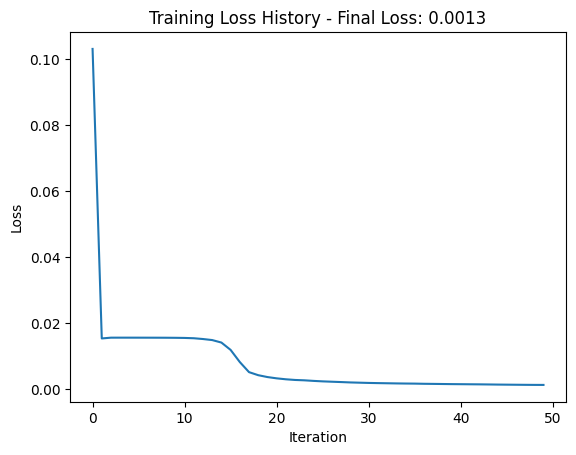

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=trainer.autoencoder_model.training_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title(f"Training Loss History - Final Loss: {trainer.autoencoder_model.training_history[-1]:.4f}")
plt.show()

In [5]:
# predict
import logging
logging.getLogger().setLevel(logging.INFO)
originals, predictions, mse_errors, fidelities = trainer.evaluate(num_test=5000)

2115it [00:00, 3666.74it/s]
/home/pi/uw/QuantumAutoencode/classical/utils/data_loader.py:92: RuntimeWarning: invalid value encountered in divide
  patched_dataset = patched_dataset / norms


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


INFO:root:Prediction time for 5000 samples: 0.1016 seconds


In [5]:
# save model
trainer.autoencoder_model.save("saved_models/mnist_cae_model")

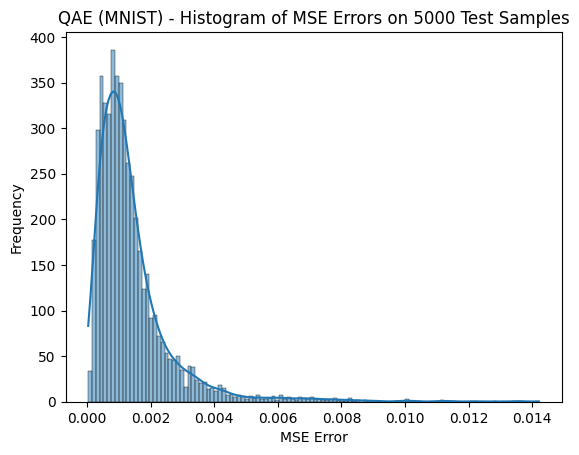

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# save mse numpy
np.save("mnist_cae_mse_errors.npy", mse_errors)
np.save("mnist_cae_fidelities.npy", fidelities)

sns.histplot(mse_errors, kde=True)
plt.title("QAE (MNIST) - Histogram of MSE Errors on 5000 Test Samples")
plt.xlabel("MSE Error")
plt.ylabel("Frequency")
plt.show()

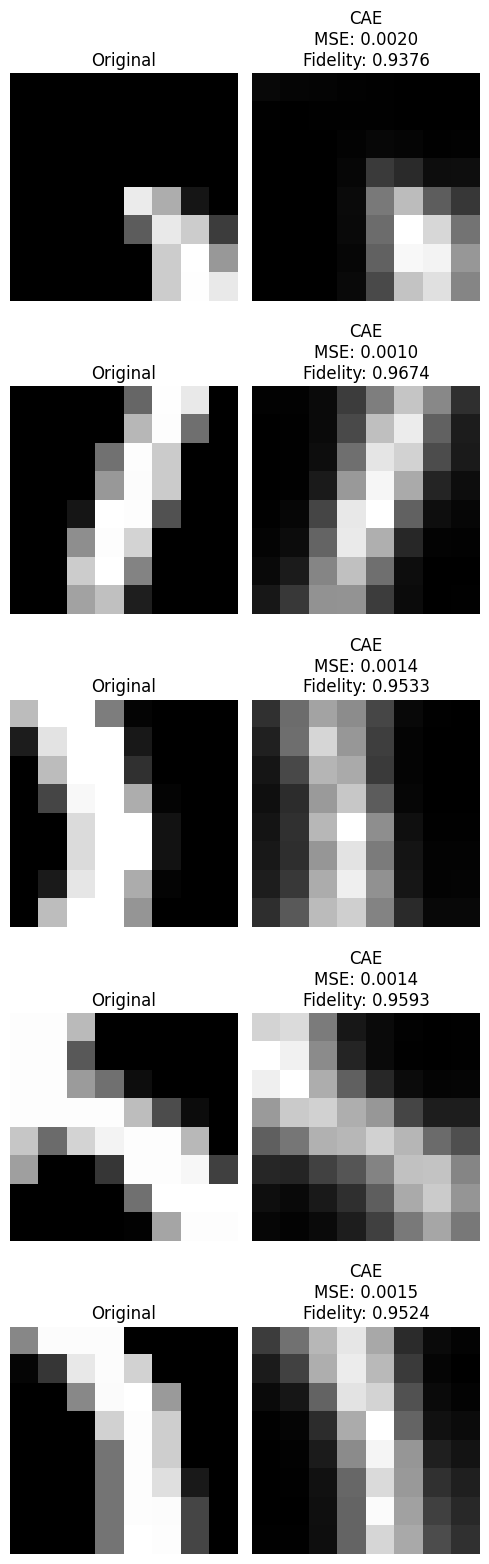

In [7]:
# plot results
fig, axes = plt.subplots(5, 2, figsize=(5, 5 * 3.2))
for i in range(5):
    axes[i, 0].imshow(originals[i].reshape(8, 8), cmap='gray')
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')
    axes[i, 1].imshow(predictions[i].reshape(8, 8), cmap='gray')
    axes[i, 1].set_title(f"CAE\nMSE: {mse_errors[i]:.4f}\nFidelity: {fidelities[i]:.4f}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()